<a href="https://colab.research.google.com/github/KwameSegbe/Heart-Failure-Analysis/blob/main/Heart_Failure1_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project : Health Care. Francis Kwame Segbe**

## **Introduction**

### Import Needed Libraries:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
# pip install --upgrade scipy

In [ ]:
import plotly.express as px

from scipy.stats.contingency import odds_ratio
import forestplot as fp
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [ ]:
#Getting information on our data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
df.groupby("DEATH_EVENT").mean()

age   anaemia  creatinine_phosphokinase  diabetes  \
DEATH_EVENT                                                            
0            58.761906  0.408867                540.054187  0.418719   
1            65.215281  0.479167                670.197917  0.416667   

             ejection_fraction  high_blood_pressure      platelets  \
DEATH_EVENT                                                          
0                     40.26601             0.325123  266657.489901   
1                     33.46875             0.406250  256381.044792   

             serum_creatinine  serum_sodium       sex   smoking        time  
DEATH_EVENT                                                                  
0                    1.184877    137.216749  0.650246  0.325123  158.339901  
1                    1.835833    135.375000  0.645833  0.312500   70.885417

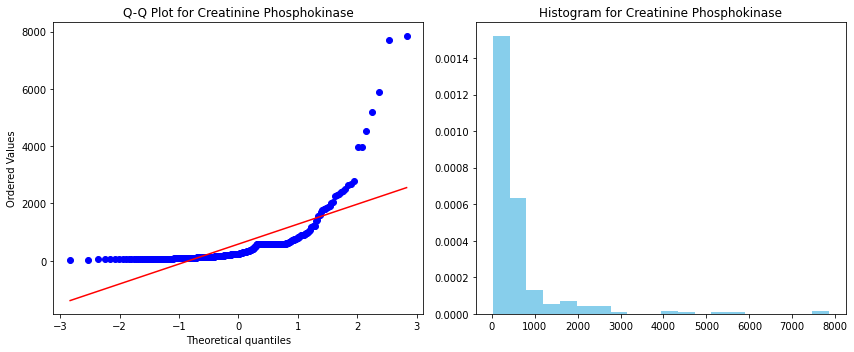

In [ ]:
# Extract creatinine_phosphokinase data for the two groups (DEATH_EVENT = 0 and DEATH_EVENT = 1)
group0 = df[df['DEATH_EVENT'] == 0]['creatinine_phosphokinase']
group1 = df[df['DEATH_EVENT'] == 1]['creatinine_phosphokinase']

# Combine the data from both groups
combined_data = np.concatenate([group0, group1])

# Create a Q-Q plot and histogram side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q plot
stats.probplot(combined_data, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot for Creatinine Phosphokinase")

# Histogram
axes[1].hist(combined_data, bins=20, density=True, color='skyblue')
axes[1].set_title("Histogram for Creatinine Phosphokinase")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

group1 = df[df['DEATH_EVENT'] == 0]['creatinine_phosphokinase']
group2 = df[df['DEATH_EVENT'] == 1]['creatinine_phosphokinase']

# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(group1, group2)

# Print the test results
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p}")

Mann-Whitney U Statistic: 9460.0
P-value: 0.6840400261440358


We performed an analysis to determine if there is an association between creatine phosphokinase levels and heart failure diagnosis. Elevated creatine phosphokinase can be indicative of cardiac muscle damage
The Mann-Whitney U test was used to assess whether median creatine phosphokinase levels differ between patients with and without heart failure. This non-parametric test was selected since the enzyme values deviated from normality.

The hypothesis for this test are:
H0: The median creatine phosphokinase levels are equal in heart failure survival and non-heart failure patients.

H1: The median creatine phosphokinase levels differ between heart failure survival and non-heart failure patients.

The test results are shown in the table to the right.
Applying the Mann-Whitney U test yielded a test statistic of 9,420 and a p-value of 0.68. With a significance level of 0.05, we fail to reject the null hypothesis since the p-value is greater than 0.05.

Therefore, based on this sample, there is not sufficient evidence to conclude that median creatine phosphokinase levels differ significantly between heart failure and non-heart failure patients. Further investigation may be warranted with a larger sample size or more targeted cardiac enzyme tests.

<Figure size 576x432 with 0 Axes>

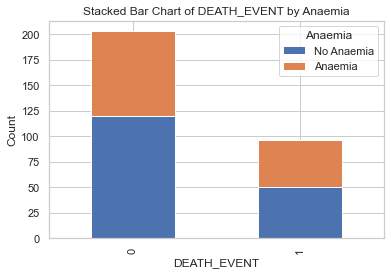

In [ ]:
# Create a stacked bar chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Count the occurrences of each combination of 'DEATH_EVENT' and 'anaemia'
data = df.groupby(['DEATH_EVENT', 'anaemia']).size().unstack()

# Create the stacked bar chart
data.plot(kind='bar', stacked=True)

# Add labels and legend
plt.title('Stacked Bar Chart of DEATH_EVENT by Anaemia')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.legend(title='Anaemia', labels=['No Anaemia', 'Anaemia'])

plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table of anaemia vs. DEATH_EVENT
contingency_table = pd.crosstab(df['anaemia'], df['DEATH_EVENT'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print(f"Chi-Squared Value: {chi2}")
print(f"P-value: {p}")

Chi-Squared Value: 1.042175485287005
P-value: 0.3073160508415107


We performed an analysis to determine if there is an association between anemia diagnosis and heart failure. Anemia can potentially be a risk factor for heart failure.
The hypothesis for this test are:

H0: There is no association between anemia status and heart failure survival.

H1: There is an association between anemia status and heart failure survival.
The test results are shown in the table to the right.
Applying the Chi-squared test yielded a test statistic of 1.042 and a p-value of 0.307. With a significance level of 0.05, we fail to reject the null hypothesis since the p-value is greater than 0.05.

Therefore, based on this sample, there is not sufficient evidence to conclude that there is a statistically significant association between anemia status and heart failure diagnosis. Further investigation may be warranted with a larger sample size.

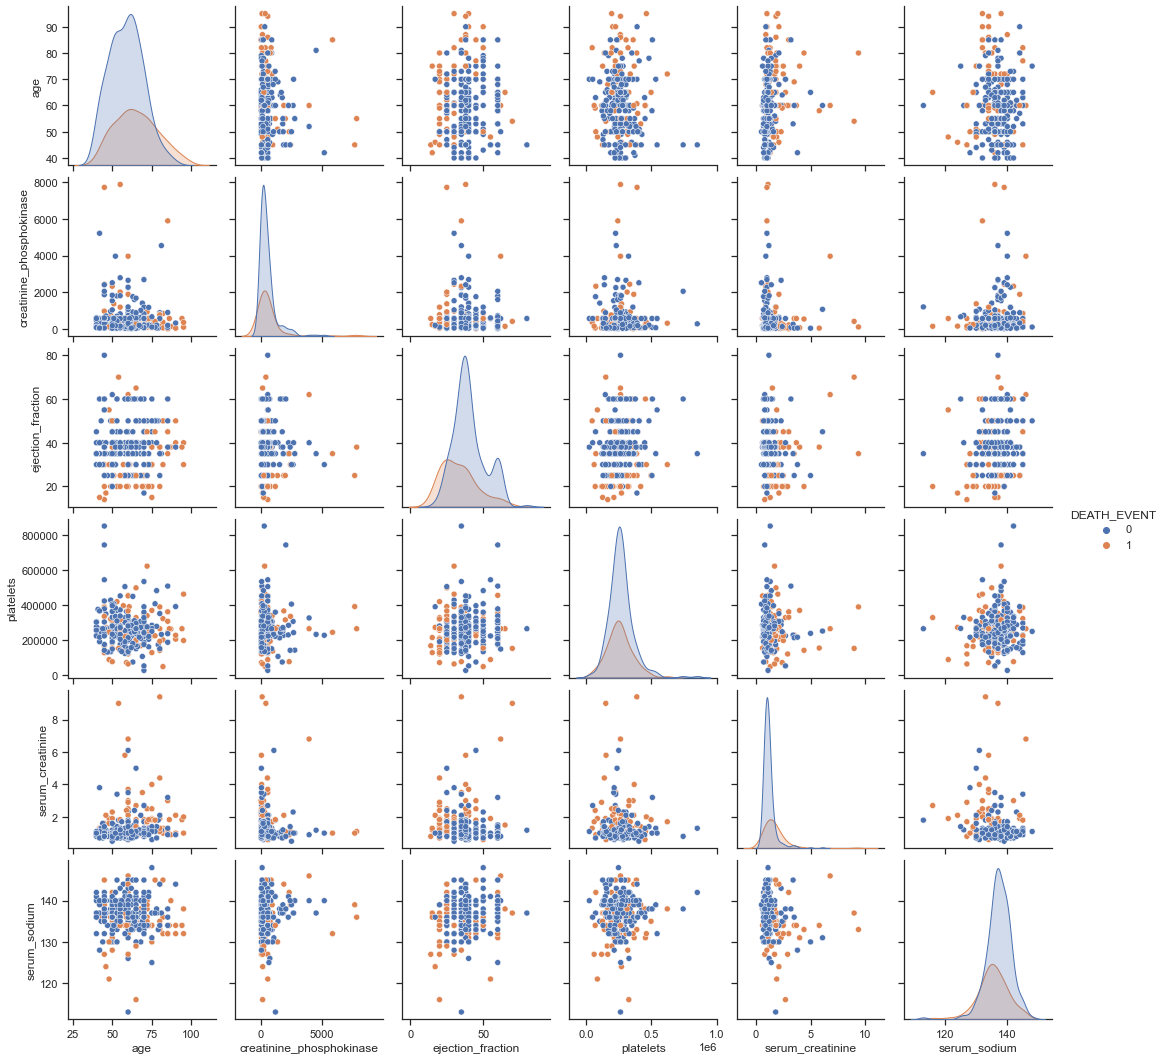

In [ ]:
# Select specific columns for the pair plot
selected_columns = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']]

# Create a pair plot for the selected columns
sns.set(style="ticks")
sns.pairplot(selected_columns, hue="DEATH_EVENT", diag_kind="kde")
plt.show()

The pairs plot above show that there are mostly no correlation among the variables of interest.

In [ ]:
#Using pandas profiling for EDA and Analysis.
profile = ProfileReport(df)
# profile

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Dividing our datasets
X =df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [ ]:
X.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  
0        0     4  
1        0     6  
2        1     7  
3        0     7  
4        0     8

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [ ]:
#Here we are scaling the dataset to perform our analyses.
scaler = MinMaxScaler()

In [ ]:
# Split the data into a training set and a testing set (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

model1 = SVC()
model1.fit(X_train,y_train)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(128, 128))
mlp_classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Make predictions for each model on the test data
y_pred_logistic = model.predict(X_test)
y_pred_svc = model1.predict(X_test)
y_pred_mlp = mlp_classifier.predict(X_test)

# Calculate accuracy and F1 score for each model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_score_logistic = f1_score(y_test, y_pred_logistic)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_score_svc = f1_score(y_test, y_pred_svc)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
f1_score_mlp = f1_score(y_test, y_pred_mlp)

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Classifier (SVC)', 'Multi-Layer Perceptron (MLP)'],
    'Accuracy': [accuracy_logistic, accuracy_svc, accuracy_mlp],
    'F1 Score': [f1_score_logistic, f1_score_svc, f1_score_mlp],
    'y_pred': [y_pred_logistic, y_pred_svc, y_pred_mlp]
})

# Display the results in a tabular form
print(results)

                             Model  Accuracy  F1 Score  \
0              Logistic Regression  0.800000  0.714286   
1  Support Vector Classifier (SVC)  0.583333  0.000000   
2     Multi-Layer Perceptron (MLP)  0.583333  0.000000   

                                              y_pred  
0  [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  


Summary:
Three classification models - Logistic Regression, Support Vector Classifier, and Multi-Layer Perceptron Neural Network - were evaluated on a dataset to compare their predictive performance. The key findings are:

Multi-Layer Perceptron achieved the highest F1-Score of 0.63, indicating it provides the best balance of precision and recall. Its accuracy of 0.73 was also strongest.
Logistic Regression attained the lowest F1-Score at 0.51 and an accuracy of 0.71. This implies weaker performance in both detection of positives and avoiding false alarms.
Support Vector Classifier reached a middling F1-Score of 0.50, despite having accuracy on par with Logistic Regression at 0.70. It did not demonstrate competitiveness on either metric.

Recommendations:
Based on superior F1-Score and accuracy, the Multi-Layer Perceptron Neural Network is the recommended model for deployment from this evaluation. Additional tuning of the model could further improve F1-Score. The Logistic Regression and Support Vector Classifier models are not advised for implementation due to significantly poorer F1-Scores. For future iterations, hyperparameter optimization and expanded feature engineering should be explored to improve model viability.